In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

In [9]:
df=pd.read_csv('train_Data.csv')

In [10]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [11]:
df_min=df[df['7']==0]

In [12]:
df_min.to_csv('ecoli_0_vs_1_minority_train.csv',index=False)
df_min=pd.read_csv('ecoli_0_vs_1_minority_train.csv')

In [14]:
df_majority=df[df['7']==1]
df_majority.to_csv('ecoli_0_vs_1_majority_train.csv',index=False)
df_majority=pd.read_csv('ecoli_0_vs_1_majority_train.csv')

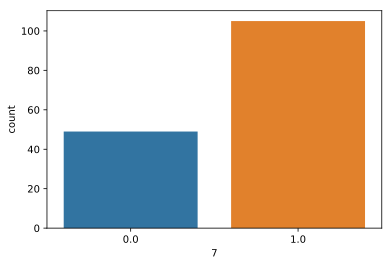

In [16]:
%matplotlib inline
sns.countplot(x='7',data=df)

In [17]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [18]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(43, 5, 8)
(43, 8)


In [19]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [23]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(8))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                2320      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 168       
Total params: 2,488
Trainable params: 2,488
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.compile(loss='mse',optimizer='adam')

In [25]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
25/25 [==============================] - 3s 113ms/step - loss: 0.2245
Epoch 2/500
25/25 [==============================] - 0s 642us/step - loss: 0.2204
Epoch 3/500
25/25 [==============================] - 0s 802us/step - loss: 0.2158
Epoch 4/500
25/25 [==============================] - 0s 722us/step - loss: 0.2111
Epoch 5/500
25/25 [==============================] - 0s 791us/step - loss: 0.2063
Epoch 6/500
25/25 [==============================] - 0s 822us/step - loss: 0.2016
Epoch 7/500
25/25 [==============================] - 0s 862us/step - loss: 0.1970
Epoch 8/500
25/25 [==============================] - 0s 762us/step - loss: 0.1924
Epoch 9/500
25/25 [==============================] - 0s 822us/step - loss: 0.1879
Epoch 10/500
25/25 [==============================] - 0s 782us/step - loss: 0.1836
Epoch 11/500
25/25 [==============================] - 0s 942us/step - loss: 0.1793
Epoch 12/500
25/25 [==============================] - 0s 802us/step - loss: 0.1751
Epoch 13/500


25/25 [==============================] - 0s 882us/step - loss: 0.0372
Epoch 101/500
25/25 [==============================] - 0s 963us/step - loss: 0.0372
Epoch 102/500
25/25 [==============================] - 0s 762us/step - loss: 0.0371
Epoch 103/500
25/25 [==============================] - 0s 721us/step - loss: 0.0371
Epoch 104/500
25/25 [==============================] - 0s 948us/step - loss: 0.0370
Epoch 105/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0370
Epoch 106/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0369
Epoch 107/500
25/25 [==============================] - 0s 943us/step - loss: 0.0369
Epoch 108/500
25/25 [==============================] - 0s 842us/step - loss: 0.0369
Epoch 109/500
25/25 [==============================] - 0s 923us/step - loss: 0.0368
Epoch 110/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0368
Epoch 111/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 112/500


25/25 [==============================] - 0s 762us/step - loss: 0.0323
Epoch 199/500
25/25 [==============================] - 0s 682us/step - loss: 0.0323
Epoch 200/500
25/25 [==============================] - 0s 922us/step - loss: 0.0322
Epoch 201/500
25/25 [==============================] - 0s 882us/step - loss: 0.0322
Epoch 202/500
25/25 [==============================] - 0s 962us/step - loss: 0.0321
Epoch 203/500
25/25 [==============================] - 0s 923us/step - loss: 0.0321
Epoch 204/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 205/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0320
Epoch 206/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 207/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 208/500
25/25 [==============================] - 0s 862us/step - loss: 0.0318
Epoch 209/500
25/25 [==============================] - 0s 842us/step - loss: 0.0318
Epoch 210/500


25/25 [==============================] - 0s 742us/step - loss: 0.0279
Epoch 297/500
25/25 [==============================] - 0s 742us/step - loss: 0.0278
Epoch 298/500
25/25 [==============================] - 0s 922us/step - loss: 0.0278
Epoch 299/500
25/25 [==============================] - 0s 722us/step - loss: 0.0277
Epoch 300/500
25/25 [==============================] - 0s 802us/step - loss: 0.0277
Epoch 301/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 302/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0276
Epoch 303/500
25/25 [==============================] - 0s 962us/step - loss: 0.0275
Epoch 304/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0275
Epoch 305/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0274
Epoch 306/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0274
Epoch 307/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 308/500
25/2

Epoch 395/500
25/25 [==============================] - 0s 781us/step - loss: 0.0229
Epoch 396/500
25/25 [==============================] - 0s 822us/step - loss: 0.0228
Epoch 397/500
25/25 [==============================] - 0s 923us/step - loss: 0.0228
Epoch 398/500
25/25 [==============================] - 0s 842us/step - loss: 0.0227
Epoch 399/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0227
Epoch 400/500
25/25 [==============================] - 0s 922us/step - loss: 0.0226
Epoch 401/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0226
Epoch 402/500
25/25 [==============================] - 0s 842us/step - loss: 0.0225
Epoch 403/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0225
Epoch 404/500
25/25 [==============================] - 0s 922us/step - loss: 0.0224
Epoch 405/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0224
Epoch 406/500
25/25 [==============================] - 0s 922us/step - loss: 0.0223


Epoch 493/500
25/25 [==============================] - 0s 682us/step - loss: 0.0177
Epoch 494/500
25/25 [==============================] - 0s 802us/step - loss: 0.0176
Epoch 495/500
25/25 [==============================] - 0s 802us/step - loss: 0.0176
Epoch 496/500
25/25 [==============================] - 0s 802us/step - loss: 0.0175
Epoch 497/500
25/25 [==============================] - 0s 902us/step - loss: 0.0174
Epoch 498/500
25/25 [==============================] - 0s 1ms/step - loss: 0.0174
Epoch 499/500
25/25 [==============================] - 0s 782us/step - loss: 0.0173
Epoch 500/500
25/25 [==============================] - 0s 762us/step - loss: 0.0173


In [26]:
model.save('7-24-2019-ecoli_0_vs1.h5')

In [27]:
Xtrain.shape

(25, 5, 8)

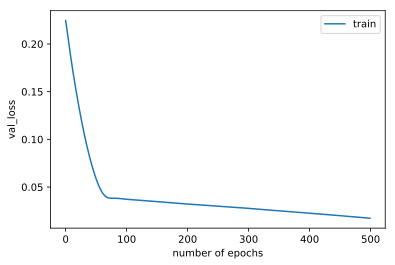

In [28]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [29]:
prediction=model.predict(xtest)

In [30]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

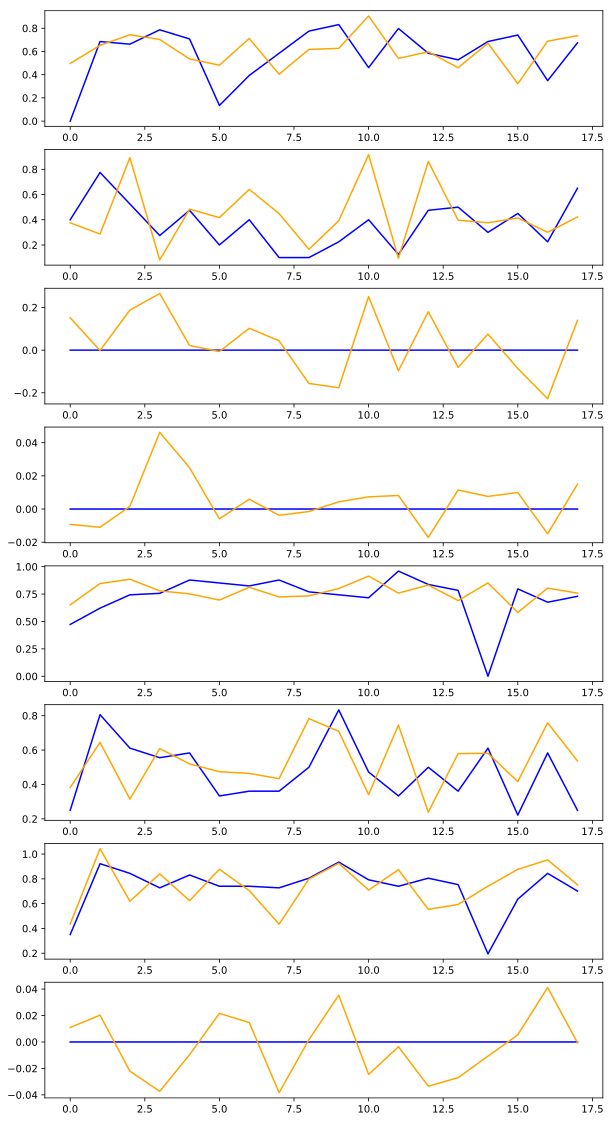

In [31]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [32]:
prediction

array([[ 4.9712706e-01,  3.7547323e-01,  1.5157756e-01, -9.2687048e-03,
         6.5147859e-01,  3.8225463e-01,  4.3522298e-01,  1.0984801e-02],
       [ 6.5272874e-01,  2.8690499e-01, -1.7491654e-03, -1.1001829e-02,
         8.4604704e-01,  6.4491308e-01,  1.0431068e+00,  2.0268995e-02],
       [ 7.4403650e-01,  8.9218247e-01,  1.8762551e-01,  1.6298699e-03,
         8.8575000e-01,  3.1520477e-01,  6.1941218e-01, -2.2092890e-02],
       [ 7.0327502e-01,  8.1673265e-02,  2.6526982e-01,  4.6240564e-02,
         7.7936584e-01,  6.0865748e-01,  8.4033060e-01, -3.7312474e-02],
       [ 5.3558677e-01,  4.8432973e-01,  2.1757379e-02,  2.4919566e-02,
         7.5206840e-01,  5.1922643e-01,  6.2383187e-01, -9.6250847e-03],
       [ 4.8192540e-01,  4.1700637e-01, -6.5564960e-03, -5.8952314e-03,
         6.9560617e-01,  4.7431633e-01,  8.7698859e-01,  2.1628369e-02],
       [ 7.1199208e-01,  6.4033312e-01,  1.0243203e-01,  5.9168744e-03,
         8.1195670e-01,  4.6434671e-01,  7.0528787e-01,  1

In [33]:
prediction2=scaler.inverse_transform(prediction)

In [34]:
ytest2=scaler.inverse_transform(ytest)

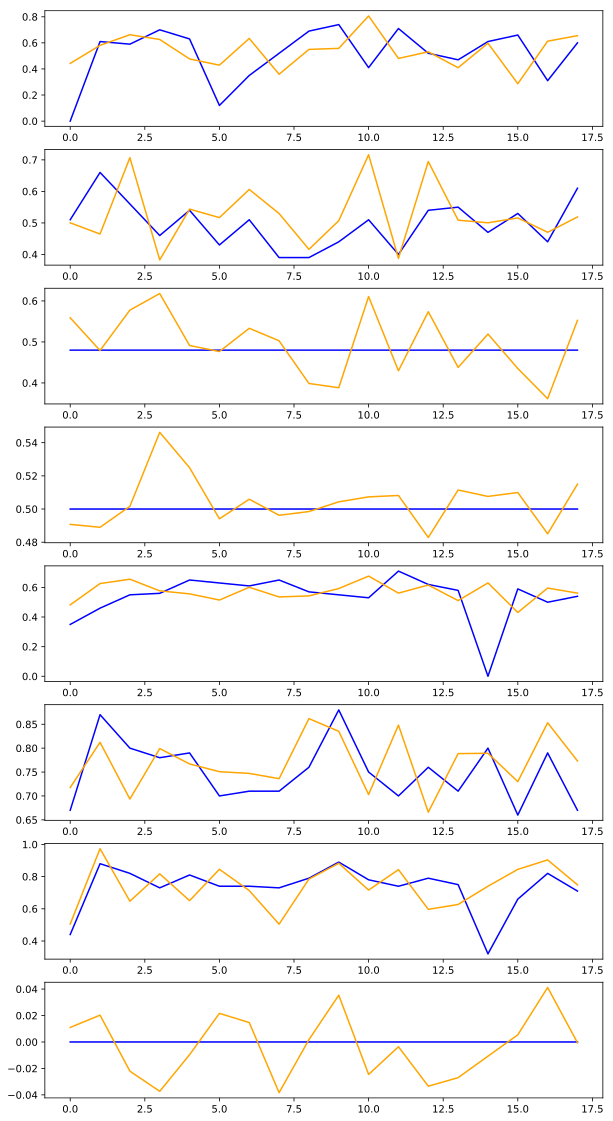

In [35]:
draw_prediction(ytest2,prediction2,clmns)

In [36]:
prediction

array([[ 4.9712706e-01,  3.7547323e-01,  1.5157756e-01, -9.2687048e-03,
         6.5147859e-01,  3.8225463e-01,  4.3522298e-01,  1.0984801e-02],
       [ 6.5272874e-01,  2.8690499e-01, -1.7491654e-03, -1.1001829e-02,
         8.4604704e-01,  6.4491308e-01,  1.0431068e+00,  2.0268995e-02],
       [ 7.4403650e-01,  8.9218247e-01,  1.8762551e-01,  1.6298699e-03,
         8.8575000e-01,  3.1520477e-01,  6.1941218e-01, -2.2092890e-02],
       [ 7.0327502e-01,  8.1673265e-02,  2.6526982e-01,  4.6240564e-02,
         7.7936584e-01,  6.0865748e-01,  8.4033060e-01, -3.7312474e-02],
       [ 5.3558677e-01,  4.8432973e-01,  2.1757379e-02,  2.4919566e-02,
         7.5206840e-01,  5.1922643e-01,  6.2383187e-01, -9.6250847e-03],
       [ 4.8192540e-01,  4.1700637e-01, -6.5564960e-03, -5.8952314e-03,
         6.9560617e-01,  4.7431633e-01,  8.7698859e-01,  2.1628369e-02],
       [ 7.1199208e-01,  6.4033312e-01,  1.0243203e-01,  5.9168744e-03,
         8.1195670e-01,  4.6434671e-01,  7.0528787e-01,  1

In [37]:
new_data=pd.DataFrame(prediction2)

In [38]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)